<a href="https://colab.research.google.com/github/Ashu10051998/Product-Recommendation-Engine/blob/main/Copy_of_Product_Recommendation_Engine_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and purchase history to recommend items and improve sales. </u></b>

### Amazon.com is one of the largest electronic commerce and cloud computing companies.

### Just a few Amazon related facts:

### They lost $4.8 million in August 2013, when their website went down for 40 mins. They hold the patent on 1-Click buying, and licenses it to Apple. Their Phoenix fulfilment centre is a massive 1.2 million square feet. Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales.


### This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

### It contains

* ### the unique UserId (Customer Identification),
* ### the product ASIN (Amazon's unique product identification code for each product),
* ### Ratings (ranging from 1-5 based on customer satisfaction) and
* ### the Timestamp of the rating (in UNIX time)

### This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

### This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Data/ratings_Beauty.csv')

In [4]:
df.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [4]:
df.shape

(2023070, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [7]:
#Finding Null Values.
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

Luckily we don't have any null values in our dataset.

In [8]:
# Checking number of unique value in each feature
df.nunique()

UserId       1210271
ProductId     249274
Rating             5
Timestamp       4231
dtype: int64

In [9]:
# checking order frequency for each unique customer id
df['UserId'].value_counts()

A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A3PGBSJ39EYHSI      1
A3C670CL1WQM4V      1
A21K8UFT8E8PCM      1
A1FQRTDQRGHFA       1
A1MX9YM3VEGUJC      1
Name: UserId, Length: 1210271, dtype: int64

In [5]:
df['ProductId'].value_counts()

B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B00G86P6D6       1
B00C89XCCO       1
B00A3QYP9S       1
B00CIDPSB8       1
B001BEJVK4       1
Name: ProductId, Length: 249274, dtype: int64

In [10]:
!pip install Klib

In [13]:
import klib

GridSpec(6, 2)

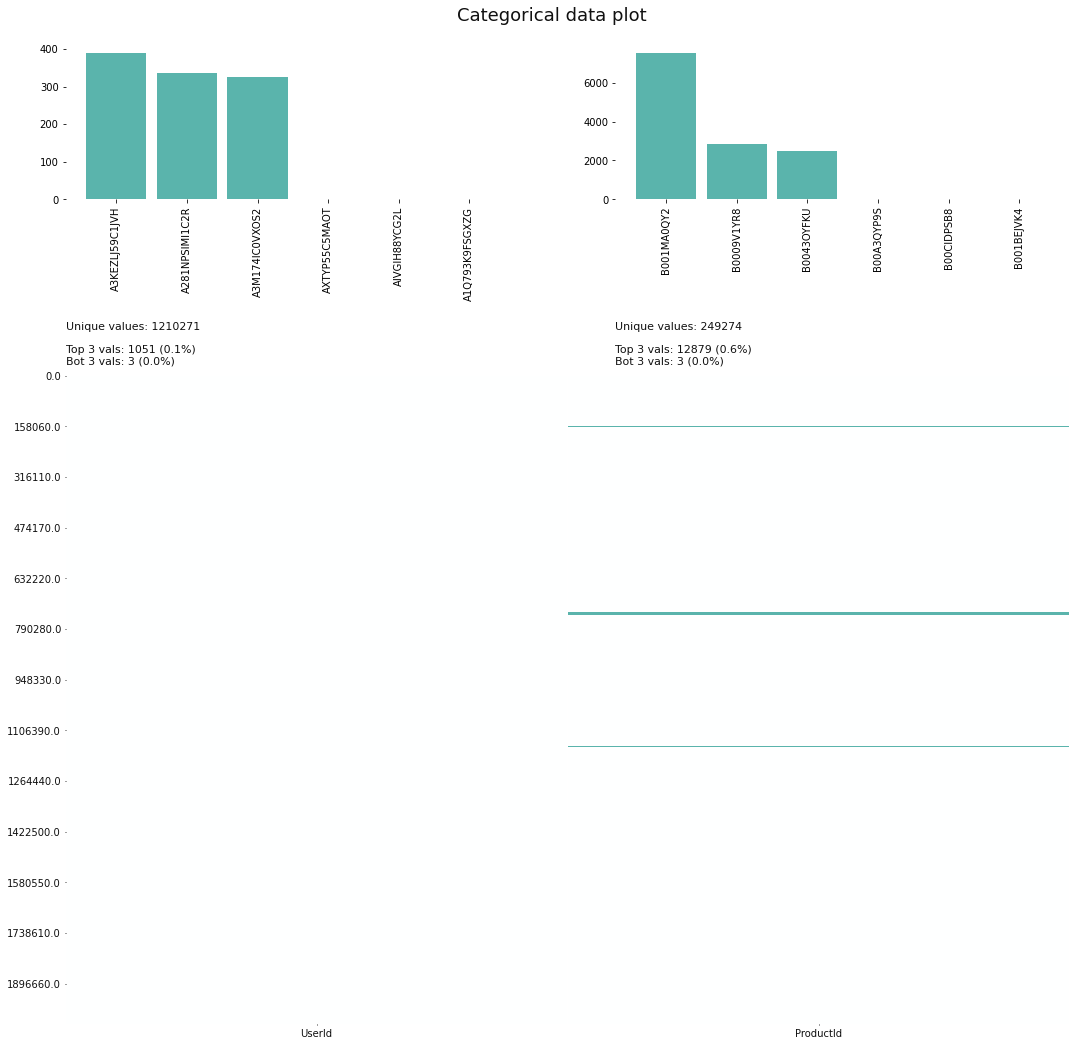

In [15]:
klib.cat_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


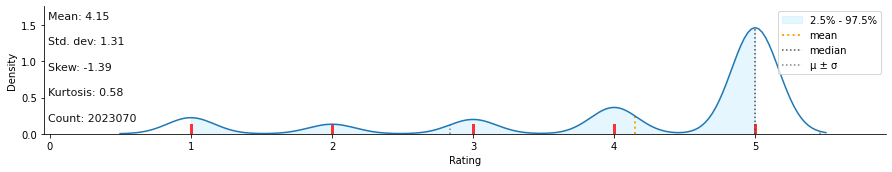

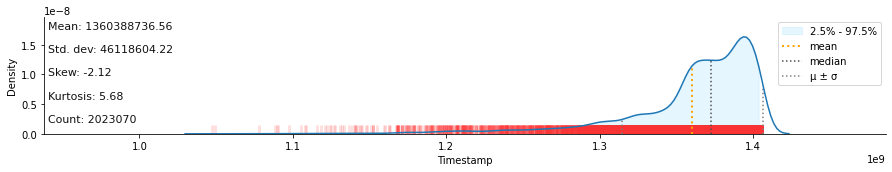

In [16]:
klib.dist_plot(df)

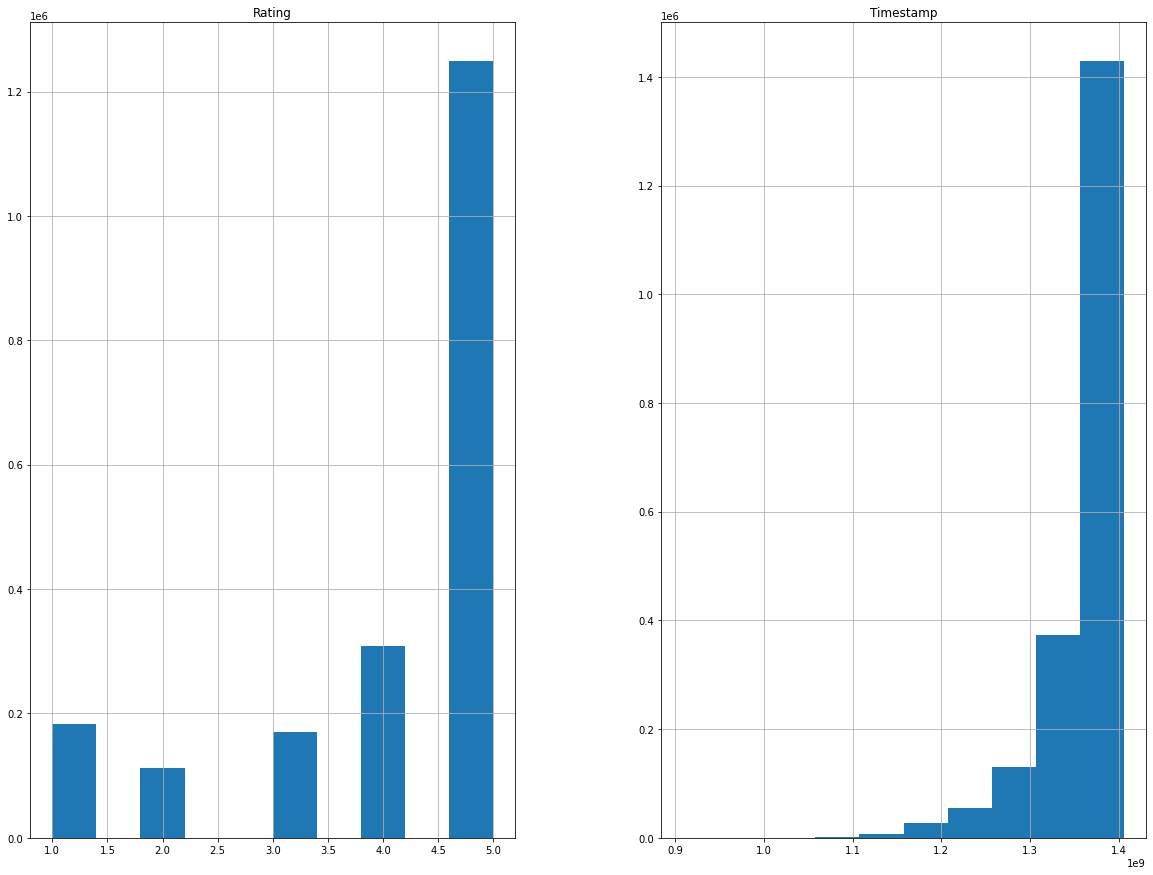

In [17]:
df.hist(figsize=(20, 15))
plt.show()

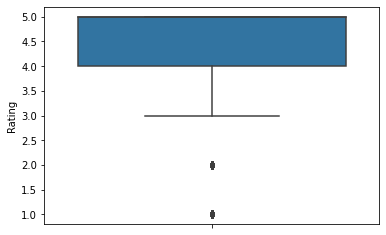

In [20]:
sns.boxplot(y='Rating',data=df)

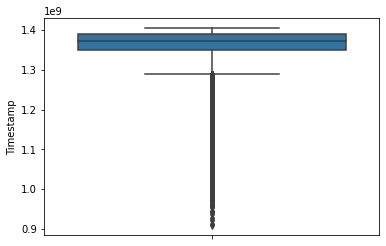

In [22]:
sns.boxplot(y='Timestamp',data=df)

In [19]:
counts=df['UserId'].value_counts()
df1=df[df['UserId'].isin(counts[counts>=10].index)]

In [23]:
df1.head(10)

,UserId,ProductId,Rating,Timestamp
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
10,A1BG8QW55XHN6U,130414643X,5.0,1372032000
13,A22VW0P4VZHDE3,130414674X,5.0,1371686400
15,A6R426V4J7AOM,1304168522,5.0,1373414400
16,A22VW0P4VZHDE3,1304174778,5.0,1372896000
18,A22VW0P4VZHDE3,1304174867,5.0,1373068800
19,A1BG8QW55XHN6U,1304174867,5.0,1372291200
20,A1BG8QW55XHN6U,1304174905,5.0,1372291200


In [25]:
df1.shape

(222897, 4)